In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaurasgarli","key":"dbf92ee97193244da3fc66a2d2861ca6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0


In [ ]:
!unzip -q "/content/sign-language-for-numbers.zip"

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/Sign Language for Numbers'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 11 directories and 0 images in /content/Sign Language for Numbers
There are 0 directories and 1500 images in /content/Sign Language for Numbers/5
There are 0 directories and 1500 images in /content/Sign Language for Numbers/1
There are 0 directories and 1500 images in /content/Sign Language for Numbers/3
There are 0 directories and 1500 images in /content/Sign Language for Numbers/9
There are 0 directories and 1500 images in /content/Sign Language for Numbers/0
There are 0 directories and 1500 images in /content/Sign Language for Numbers/4
There are 0 directories and 1500 images in /content/Sign Language for Numbers/7
There are 0 directories and 1500 images in /content/Sign Language for Numbers/unknown
There are 0 directories and 1500 images in /content/Sign Language for Numbers/2
There are 0 directories and 1500 images in /content/Sign Language for Numbers/8
There are 0 directories and 1500 images in /content/Sign Language for Numbers/6


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random

def view_random_image(target_dir, target_class):
  target_dir = pathlib.Path(target_dir) / target_class
  random_image = random.choice(os.listdir(target_dir))
  img = mpimg.imread(target_dir / random_image)

  plt.imshow(img, cmap='gray')
  plt.title(target_class)
  plt.axis('off')
  return img.shape

(100, 75)

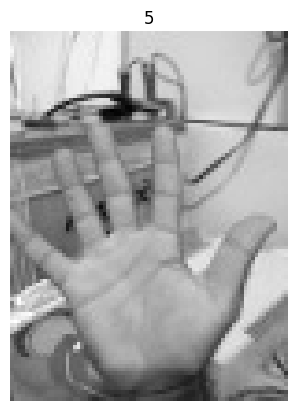

In [ ]:
view_random_image('/content/Sign Language for Numbers', '5')

In [ ]:
import shutil

shutil.rmtree('/content/Sign Language for Numbers/unknown')

In [ ]:
import tensorflow as tf
IMG_SIZE = (100, 100)

data_path = '/content/Sign Language for Numbers'

train_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', color_mode='grayscale', subset='training', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', color_mode='grayscale', subset='validation', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)

Found 15000 files belonging to 10 classes.
Using 12000 files for training.
Found 15000 files belonging to 10 classes.
Using 3000 files for validation.


In [ ]:
for images, labels in train_data.take(1):
  print(images.shape)

(32, 100, 100, 1)


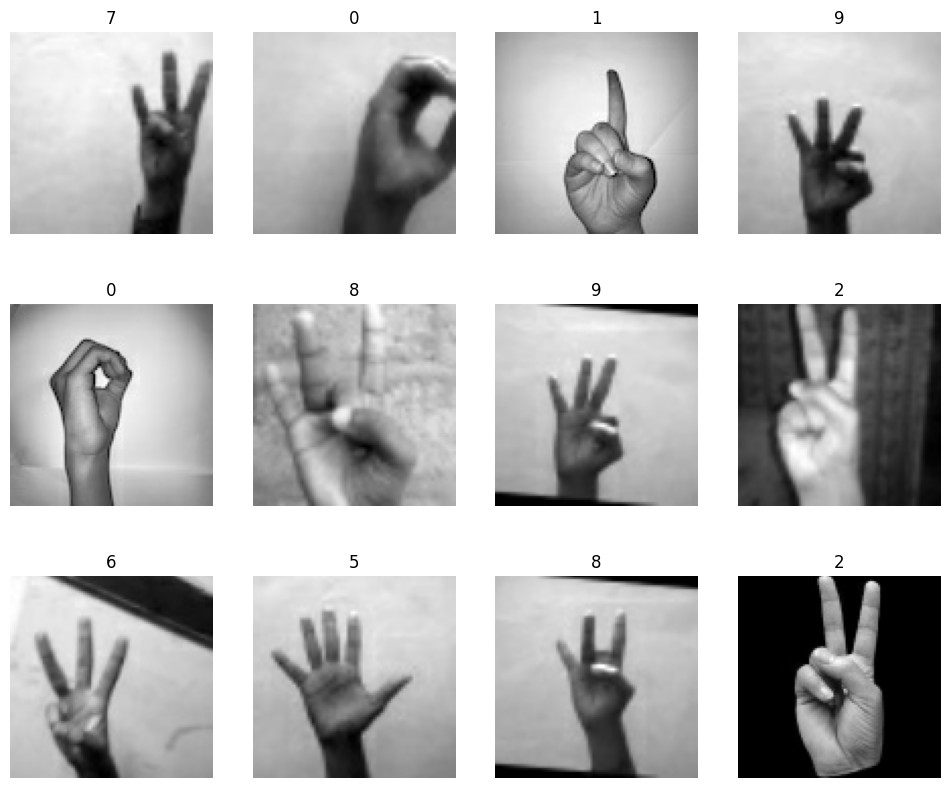

In [ ]:
class_names = train_data.class_names

plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i] / 255, cmap='gray')
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis('off')

In [ ]:
inputs=tf.keras.layers.Input(shape=(100, 100, 1))

x = tf.keras.applications.efficientnet.preprocess_input(inputs)

x = tf.keras.layers.Concatenate()([inputs, inputs, inputs])

base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation = 'softmax')(avg)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
base_model.trainable=False

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights=True)

check_point = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only = True)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[early_stopping, check_point])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_239']
Received: inputs=Tensor(shape=(None, 100, 100, 1))
  warnings.warn(msg)


375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.5868 - loss: 1.3905 - val_accuracy: 0.8237 - val_loss: 0.6430
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8411 - loss: 0.5935 - val_accuracy: 0.8723 - val_loss: 0.4731
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8821 - loss: 0.4470 - val_accuracy: 0.8950 - val_loss: 0.3990
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9020 - loss: 0.3784 - val_accuracy: 0.9087 - val_loss: 0.3430
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9153 - loss: 0.3225 - val_accuracy: 0.9200 - val_loss: 0.3113
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9273 - loss: 0.2880 - val_accuracy: 0.9247 - val_loss: 0.2845
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9363 - loss: 0.2592 - val_accuracy: 0.9270 - val_loss: 0.2675
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9360 - loss: 0.2424 - val_accuracy: 0

In [ ]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9415 - loss: 0.2090


[0.1777809113264084, 0.9509999752044678]

In [ ]:
model.save("NumberHandSignClassifier.keras")